In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder as LE
import matplotlib.pyplot as plt
import numpy as np
import pickle
import joblib
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,roc_auc_score,roc_curve

In [22]:
df = pd.read_csv('/content/Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [24]:
fraud_rows = df[df['isFraud'] == 1]
non_fraud_rows = df[df['isFraud'] == 0]

non_fraud_sample_size = 50000

non_fraud_sample = non_fraud_rows.sample(n=non_fraud_sample_size, random_state=42)


sampled_df = pd.concat([fraud_rows, non_fraud_sample])


df = sampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

print("Class distribution in sampled data:")
print(df['isFraud'].value_counts())

Class distribution in sampled data:
isFraud
0    50000
1     8213
Name: count, dtype: int64


In [25]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [26]:
df.shape

(58213, 11)

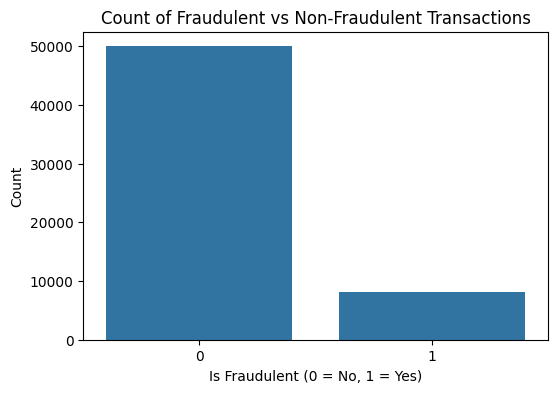

In [27]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='isFraud')
plt.title('Count of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Is Fraudulent (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

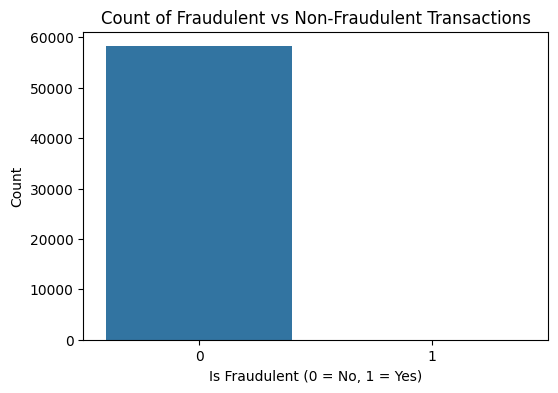

In [28]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='isFlaggedFraud')
plt.title('Count of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Is Fraudulent (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [29]:
s,t=0,0
for x in df['isFlaggedFraud']:
    if x==1:
        s=s+1
    else:
        t=t+1
print(f'{s,t}')

(16, 58197)


In [30]:
s,t=0,0
for x in df['isFraud']:
    if x==1:
        s=s+1
    else:
        t=t+1
print(f'{s,t}')

(8213, 50000)


In [31]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,141,PAYMENT,9089.15,C916609715,36375.0,27285.85,M1988694494,0.00,0.00,0,0
1,39,CASH_IN,46702.66,C1196708951,1403541.1,1450243.76,C691837768,3249011.68,3202309.03,0,0
2,103,CASH_OUT,1254092.10,C1741433244,1254092.1,0.00,C663883872,0.00,1254092.10,1,0
3,404,PAYMENT,13511.09,C1225743917,49827.0,36315.91,M798517647,0.00,0.00,0,0
4,308,CASH_OUT,24681.51,C328549376,429568.0,404886.49,C630329198,271223.66,295905.16,0,0


In [32]:
df.shape

(58213, 11)

In [33]:
df1=df
df1 = df1.drop(['step', 'nameOrig', 'nameDest','isFlaggedFraud'], axis=1)

In [34]:
from sklearn.preprocessing import OneHotEncoder

a=df1['type'].unique()


In [35]:
df1 = pd.get_dummies(df1, columns=['type'])
print("Data with One-Hot Encoding:")
df1.head()

Data with One-Hot Encoding:


,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9089.15,36375.0,27285.85,0.00,0.00,0,False,False,False,True,False
1,46702.66,1403541.1,1450243.76,3249011.68,3202309.03,0,True,False,False,False,False
2,1254092.10,1254092.1,0.00,0.00,1254092.10,1,False,True,False,False,False
3,13511.09,49827.0,36315.91,0.00,0.00,0,False,False,False,True,False
4,24681.51,429568.0,404886.49,271223.66,295905.16,0,False,True,False,False,False


In [36]:
df1 = df1.drop(columns=['isFraud'])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1)
df1 = pd.DataFrame(scaled_data, columns=df1.columns)
df1.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,-0.303043,-0.300982,-0.257543,-0.299024,-0.330275,-0.477486,-0.771028,-0.073643,1.551920,-0.408015
1,-0.270768,0.164174,0.260399,0.660465,0.533021,2.094302,-0.771028,-0.073643,-0.644363,-0.408015
2,0.765260,0.113326,-0.267475,-0.299024,0.007810,-0.477486,1.296970,-0.073643,-0.644363,-0.408015
3,-0.299249,-0.296406,-0.254257,-0.299024,-0.330275,-0.477486,-0.771028,-0.073643,1.551920,-0.408015
4,-0.289664,-0.167205,-0.120101,-0.218927,-0.250503,-0.477486,1.296970,-0.073643,-0.644363,-0.408015


In [37]:
df1.shape

(58213, 10)

In [38]:
y = df['isFraud']
X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size=0.3, random_state=42)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
accuracy=matthews_corrcoef(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8083220436475232


In [ ]:
j={
    'knn':{
        'model':KNeighborsClassifier(),
        'parameter':
        {
            'n_neighbors':np.arange(1,10)
        }
    },
    'SVM':{
        'model':SVC(),
        'parameter':
        {
            'C':np.arange(0.1,1.5,0.1),
            'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
            'gamma':['scale', 'auto'],
            'class_weight':['balanced',{0:1,1:5},{0:1,1:6},{0:1,1:7}]
           }
    },
    'logistic':{
        'model':LogisticRegression(),
        'parameter':
        {
            'penalty':['l1','l2','elasticnet',None],
            'dual':[True,False],
            'class_weight':['balanced',{0:1,1:5},{0:1,1:6},{0:1,1:7}]
        }
    },

    'AdaBoost':{
        'model':AdaBoostClassifier(),
        'parameter':
        {
            'learning_rate':np.arange(0.1,1.5,0.1),
            'class_weight':['balanced',{0:1,1:5},{0:1,1:6},{0:1,1:7}]
        }
    },
    'Bagging':{
        'model': BaggingClassifier(),
        'parameter':
        {
            'class_weight':['balanced',{0:1,1:5},{0:1,1:6},{0:1,1:7}]
        }
    },
    'Random Forest':{
        'model':RandomForestClassifier(),
        'parameter':
        {
            'class_weight':['balanced',{0:1,1:5},{0:1,1:6},{0:1,1:7}]
        }
    },
    'Naive Bayes':{
    'model':GaussianNB(),
    'parameter':{}},
    'Feed Forward Neural Network':
    {
    'model':MLPClassifier(),
    'parameter':
        {
            'hidden_layer_sizes':[(16,32,1)],
            'activation':['identity', 'logistic', 'tanh', 'relu'],
            'solver':['lbfgs', 'sgd', 'adam'],
            'alpha':np.arange(0.00001,0.01,0.001),
            'batch_size':np.arange(50,100),
            'learning_rate':['constant', 'invscaling', 'adaptive'],
            'early_stopping':[True],
            'class_weight':['balanced',{0:1,1:5},{0:1,1:6},{0:1,1:7}]
        }
    }
}

In [ ]:
s=[]
from sklearn.model_selection import GridSearchCV
for m,p in j.items():
  try:
    GV=GridSearchCV(p['model'],p['parameter'],cv=5,scoring='matthews_corrcoef')
    GV.fit(X_train,y_train)
    s.append({'model_name':m,'model_param':GV.best_params_,'score':GV.best_score_})
  except:
    pass

In [47]:
m=RandomForestClassifier(class_weight={0:1,1:7})
m.fit(X_train,y_train)
y_pred=m.predict(X_test)
accuracy=matthews_corrcoef(y_test, y_pred)
print("Accuracy:", accuracy)
v=confusion_matrix(y_test,y_pred)
print(v)


Accuracy: 0.9797879459971132
[[14979    55]
 [   30  2400]]


In [ ]:
dfr=pd.DataFrame(s,columns=['model_name','model_param','score'])
dfr.to_csv('result.csv', index=False)
dfr

In [44]:
def matthews_correlation(y_true, y_pred):
    """Matthews correlation metric.

    It is only computed as a batch-wise average, not globally.

    Computes the Matthews correlation coefficient measure for quality
    of binary classification problems.
    """
    y_pred_pos = tf.round(tf.clip_by_value(y_pred, 0, 1))
    y_pred_neg = 1 - y_pred_pos

    y_pos = tf.round(tf.clip_by_value(y_true, 0, 1))
    y_neg = 1 - y_pos

    tp = tf.reduce_sum(y_pos * y_pred_pos)
    tn = tf.reduce_sum(y_neg * y_pred_neg)

    fp = tf.reduce_sum(y_neg * y_pred_pos)
    fn = tf.reduce_sum(y_pos * y_pred_neg)

    numerator = (tp * tn - fp * fn)
    denominator = tf.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

    return numerator / (denominator + tf.keras.backend.epsilon())

In [45]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
class_weights = {0: 1, 1: 7}
model = Sequential()
model.add(Dense(units=16, activation='relu', input_dim=len(X_train.columns)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['matthews_corrcoef'])
model.fit(X_train, y_train, epochs=200, batch_size=32,class_weight=class_weights )

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


KeyError: 1

In [46]:
import numpy as np
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

# Assuming y_train contains only 0 and 1
# and there's a mismatch between index and values
class_weights = {0: 1, 1: 7}
# Convert y_train to NumPy array if it's a Pandas Series
y_train_np = y_train.to_numpy()

# Check the unique values in y_train_np
unique_values = np.unique(y_train_np)

# If unique values are not 0 and 1, remap them
if not np.array_equal(unique_values, [0, 1]):
    # Create a mapping from unique values to 0 and 1
    value_mapping = {unique_values[i]: i for i in range(len(unique_values))}

    # Apply the mapping to y_train_np
    y_train_np = np.vectorize(value_mapping.get)(y_train_np)

model = Sequential()
model.add(Dense(units=16, activation='relu', input_dim=len(X_train.columns)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=[matthews_corrcoef])

# Use the NumPy array and potentially remapped class weights
model.fit(X_train, y_train_np, epochs=200, batch_size=32, class_weight=class_weights)

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


TypeError: Expected sequence or array-like, got <class 'tensorflow.python.framework.ops.SymbolicTensor'>

In [48]:
with open('data.pkl', 'wb') as file:
    pickle.dump(m, file)